# TMO 2018-2019: Práctica de Deep Learning


### Datos de lo alumnos:
 - **Daniel Calderón**
 - **Guillermo Iglesias García**
 - **Alexandre Novo**
 - **Francisco Vilches**

 
### HONESTIDAD ACADÉMICA Y POlÍTICA DE COPIAS/PLAGIO: 
La realización de los ejercicios serán realizadas en grupos de 3 ó 4 alumnos. Cada grupo deberá entregar una solución indicando arriba la lista de alumnos que componen el grupo. La discusión y el intercambio de información de carácter general con otros grupos se permite (e incluso se recomienda), pero NO AL NIVEL DE CÓDIGO. Igualmente el remitir código de terceros, obtenido a través de la red o cualquier otro medio, sin referenciarlos explícitamente, se considerará plagio.

Cualquier plagio o compartición de código que se detecte significará automáticamente la calificación de CERO EN LA ASIGNATURA para TODOS los alumnos involucrados. 

### Datos
Para la realización de este trabajo se deberá usar el conjunto de datos [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). Se trata de un conjunto de datos con imágenes de articulos de la tienda Zalando. Se compone de 60.000 muestras y un test de 10.000 muestras. Cada muestra es una imagen 28x28 en escala de grises asociada con una de las 10 posibles clases. Este conjunto de datos reemplaza al clásido MNIST para problemas de machine learning. 

<img src='fashion-mnist-sprite.png' width=50% />

MNIST es el primer conjunto de datos que los investigadores suelen usar. Se dice que "si no funciona con MNIST, no funcionará con nada" y "que funcione con MNIST no implica que funcione con otros".

Algunas de las razones por las que se quiere reemplazar al clásico MNIST:

   - MNIST es muy fácil. Las redes convoucionales alcanzan un 99.7% de presición. Técnicas clásicas de machine learning pueden llegar al 97% fácilmente. En realidad, la mayoría de los dígitos de MNIST se pueden diferenciar bastante bien solamente usando un pixel.

<img src='one_pixel.png' width=50% />
  
   - MNIST está sobreusado. En abril de 2007, investigadores de Google Brain e Ian Goodfellow sugirieron a los investigadores dejar de usar MNIST.
   - MNIST no representa a las tareas actuales de visión artificial como dijo François Chollet (creador de Keras e investigador de Google).
   
<img src='chollet.png' width=50% />

#### Lectura de los datos

```
import tensorflow as tf
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()
```


## Objetivos
Se pide crear una red neuronal para predecir la clase correspondiente de cada muestra.

Se valorará:

   - Las diferentes estructuras de redes probadas.
   - El uso de diferentes técnicas de regularización.
   - El uso de expansión de datos.
   - Usar técnicas de fine-tuning o transfert learning.
   
#### Recursos

Si algún grupo considera que no dispone de equipamiento suficiente para llevar a cabo este trabajo escribir un correo a dsolis@us.es. Se le proporcionará al grupo un cuenta en un servidor con GPU.

## Tareas

Para la realización de las tareas se podrá usar `keras`, `pandas` y `numpy`.


## Entrega
Se deberá entregar este archivo con las implementaciones realizadas y comentadas. Además, se pide que el alumno añada una sección final en la que comente los resultados obtenidos y los problemas encontrados a lo largo del desarrollo de la solución. 

Importante: No enviar el conjunto de datos, ni el modelo obtenido.

**El plazo límite de entrega de la práctica es el 15 de Agosto de 2019.**


## Dudas
Para resolver cualquier duda contactar con David Solís (dsolis@us.es).

**IMPORTANTE:** Recordad rellenar la cabecera de este fichero con vuestros nombres.

## Preparación de los datos

El primer paso de todo modelado es la preparación y carga de los datos. En este caso se trata del problema Fashion MNIST.

Los datos pueden cargarse haciendo uso de Tensorflow, que proporciona una instrucción directa para descargar las imágenes ya con formato unificado de 28x28 pixels en escala de grises, para lo cual se sigue la recomendación incluida en el enunciado:

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


Se puede ver que el proceso de carga de datos separa, como ya se viera en los ejemplos de clase con MNIST, adecuadamente las diversas partes de que consta este dataset: (conjunto de entrenamiento, conjunto de test), y cada uno de estos conjuntos está formado por un conjunto de datos (imágenes, en este caso concreto), con sus respectivas salidas que son las etiquetas de clasificación (y_train, y_test). 

Para ver que la carga de ha realizado correctamente, y que la estructura de los datos se encuentra de la manera esperada, pueden utilizarse algunas instruccionesde Python ya conocidas como:

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
len(y_train)

60000

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
len(y_test)

10000

In [8]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Puede resultar interesante ver una pequeña muestra gráfica de las imágenes que hemos cargado en nuestro dataset. Para ello se puede hacer uso de la librería matplotlib. 

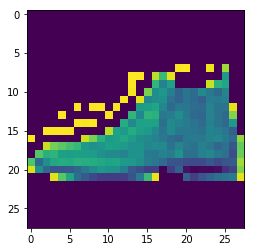

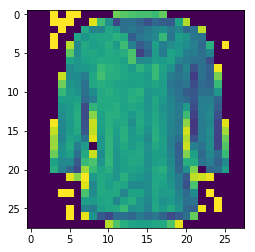

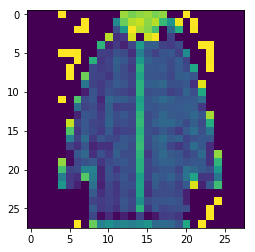

In [11]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def gen_image(arr):
    conv = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(conv, interpolation='nearest')
    return plt

gen_image(x_test[0]).show()
gen_image(x_test[4]).show()
gen_image(x_test[888]).show()

Lo visto hasta ahora nos puede servir como pequeña introducción y para hacernos una idea de los datos con los que vamos a trabajar. Es el momento de pasar a la siguiente fase y empezar con la construcción de modelos que nos permitan clasificar las imágenes de que disponemos.

El flujo de trabajo a seguir será el habitual en casos de Machine Learning Supervisado:

    1. Se le pasan al modelo (una red neuronal, en nuestro caso) los datos de entrenamiento: x_train, y_train.
    
    
    2. El modelo deberá aprender a asociar las imágenes con las etiquetas correspondientes.
    
    3. Se comprueba la bondad del modelo sobre los datos reservados para el test (x_test), viendo si las respuestas dadas  por el modelo (predicciones) coinciden con las almacenadas en y_test.

## Construcción de diversas estructuras de redes

### RN básica

Como primera aproximación al problema planteado, y con vistas a obtener un punto de partida en nuestro análisis, se opta por el uso de una Red Neuronal muy básica, con una única capa de entrada y otra de salida. 

Se va a situar una capa de entrada con 784 (= 28 * 28) neuronas (que recibirán cada uno de los 784 pixels de cada imagen), con función de activación ReLU, y una capa de salida con 10 neuronas (una neurona para cada una de las posibles etiquetas de salida), y con activación softmax (por lo que se podrá interpretar como una probabilidad de salida que indica lo probable que es que la imagen de entrada tenga cada una de las etiquetas como salida).

El primer paso es cargar la librería keras que permitirá interactuar a Python con la librería de Deep Learning que usemos (en este caso particular, Tensorflow).

In [13]:
import keras
print(keras.__version__)
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.2.4
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2987581036816600698
]


Como segundo paso se procede a la creación de nuestra RN básica.

In [14]:
from keras import models
from keras import layers
#from keras.utils.vis_utils import plot_model

red = models.Sequential()
red.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
red.add(layers.Dense(10, activation='softmax'))

En el caso de la red que hemos definido, este dispositivo consta de una secuencia de dos capas densas, que son capas neurales totalmente conectadas. La segunda (y última) capa es una capa "softmax" de 10 salidas, lo que significa que devolverá un vector probabilístico de 10 valores (es decir, 10 valores en  [0,1]  que suman 1). Cada uno de estos valores se interpretará la probabilidad de que la imagen actual pertenezca a una de las 10 clases (los dígitos del 0 al 9).

Hasta ahora solo hemos definido la estructura de la red, pero no hemos dado ninguna información acerca de cómo se llevará a cabo el entrenamiento. Para ello, hemos de indicarle a Keras algunas características adicionales, tales como el optimizador que permitirá modificar los pesos de la red, qué función objetivo (de error) se usará para dirigir esta optimización, y la métrica que usaremos para medir cómo se va comportando la red a medida que se entrena.

Keras proporciona la función compile que permite establecer estas (y otras) propiedades sobre una red ya definida:

In [15]:
red.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Debido a que la red neuronal que vamos a usar debe recibir como dato de entrada cada imagen de forma aplanada (es decir, no como una matriz de 28x28, sino como un vector de 28x28=784 posiciones), nuestro primer paso es hacer uso de las instrucciones que proporciona Keras para transformar la forma de los datos de entrada. Además, aprovecharemos para normalizar el contenido de estas imágenes (están en escalas de grises con valores uint8 entre 0 y 255, y las pasaremos a valores float32 en  [0,1] ), algo aconsejable cuando se trabaja con este tipo de modelos:

In [16]:
x_train = x_train.reshape((60000, 28 * 28)) ## aplanar las imágenes
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

Además, vamos a convertir las etiquetas (que vienen en el dataset como valores enteros), en vectores binarios para que se correspondan con la salida que nuestra red puede proporcionar:

In [17]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Preparados los datos y definida la red (estructura y funcionalidad), podemos hacer uso de la instrucción fit para comenzar el proceso de entrenamiento sobre los datos que tenemos. Esencialmente, hemos de indicar sobre qué datos entrenar (entrada y salidas), cuántas iteraciones (epochs) y con qué tamaño de batch (cada cuántos ejemplos el algoritmos actualiza los pesos).

Durante el proceso de entrenamiento, Keras informa de los valores que toma la función objetivo, así como de la/s métrica/s que hemos fijado en la compilación.

In [18]:
red.fit(x_train, y_train, epochs=5, batch_size = 128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.5559 - acc: 0.8006
Epoch 2/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.3791 - acc: 0.8614 1s - loss:
Epoch 3/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.3356 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.3098 - acc: 0.8859
Epoch 5/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.2915 - acc: 0.8924 


Debemos tener en cuenta que los valores mostrados son el error y métricas calculados sobre los propios datos de entrenamiento. Sin embargo, como el objetivo de un modelo de aprendizaje es generalizar bien sobre datos que el proceso de entrenamiento no ha visto anteriormente, necesitamos el conjunto de test para evaluar cómo se comporta la red sobre ejemplos que no ha usado para ajustarse.

Sobre los datos de entrenamiento alcanzamos rápidamente una precisión de 0.989 (i.e. 98.9%), pero veamos cómo de bien se comporta con los datos de test (que no ha usado para aprender):

In [19]:
test_loss, test_acc = red.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 60us/step


In [20]:
print('test_acc:', test_acc)

test_acc: 0.8724


Lo normal es que la red se comporte peor en los datos de test que en los datos de entrenamiento, ya que el proceso de entrenamiento consiste precisamente en ajustar los pesos para que el error cometido en estos últimos se minimice. Esta diferencia de comportamiento entre entrenamiento y test se denomina overfitting (o sobreajuste). En todo caso, con una red tan simple como la que hemos usado se alcanzan cotas de casi el 98% de aciertos.

Finalmente, podemos ver las predicciones que hace la red sobre algunos datos del conjunto de test (mostramos también las etiquetas aaociadas a los datos usados, pero ten en cuenta que están en formato binarizado, y el índice 1 corresponde a la etiqueta 0, el índice 2 a la etiqueta 1, etc...):

In [21]:
np.argmax(red.predict(x_test[2:8]))

1

In [22]:
y_test[2:8]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)